# SVM (Support Vector Machine)
**하이퍼 파라미터**

<table>
  <thead>
    <tr>
      <th>파라미터 명</th>
      <th>설명</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><code>C</code></td>
      <td>
        학습 데이터의 오류 허용도를 결정<br>
        C 값이 크면 오류를 최소화하고, 결정 경계가 데이터에 더 민감해짐 (마진을 최대화하는 대신 오류를 허용하지 않으므로 과대적합 가능성)<br>
        C 값이 작으면 오류를 허용하면서 일반화에 더 집중 (마진을 최대화하려고 노력하면서 오류를 어느 정도 허용하나 과소적합 가능성)
      </td>
    </tr>
    <tr>
      <td><code>kernel</code></td>
      <td>
        비선형 데이터의 변환을 위한 커널 함수 설정
        <ul>
          <li><code>linear</code>: 선형 커널 (데이터가 선형적으로 분리 가능한 경우)</li>
          <li><code>poly</code>: 다항식 커널 (비선형 관계, 차수 degree로 지정)</li>
          <li><code>rbf</code>: RBF(Radial Basis Function)커널, 가우시안 커널로 비선형 데이터 처리</li>
          <li><code>sigmoid</code>: 시그모이드 커널</li>
        </ul>
      </td>
    </tr>
  </tbody>
</table>

In [47]:
#데이터 준비
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

iris_data = load_iris()
X = iris_data.data
y = iris_data.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [48]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(X_train,y_train)

svm_model.score(X_test,y_test)

1.0

In [49]:
df = pd.DataFrame(iris_data.data[:,:2],columns=iris_data.feature_names[:2])
df['target'] = iris_data.target

In [50]:
X = iris_data.data[:,:2]
y = iris_data.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [51]:
svm_clf = SVC(kernel='linear',C=1.0)
svm_clf.fit(X_train,y_train)

svm_clf.score(X_train,y_train),svm_clf.score(X_test,y_test)


(0.8, 0.9)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


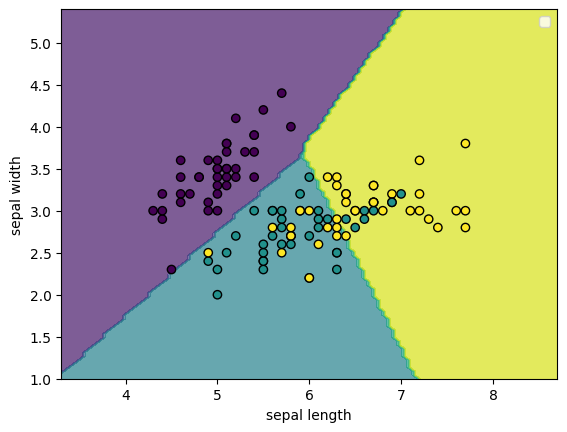

In [52]:
# 시각화
from sklearn.inspection import DecisionBoundaryDisplay

# 결정 경계
dbd = DecisionBoundaryDisplay.from_estimator(svm_clf,X_train,alpha=0.7)
# 훈련 데이터 산점도
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,edgecolor='k')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()




In [53]:
#RBF 커널 사용 시각화
svm_clf = SVC(kernel='rbf',C=1.0,gamma=10.5)

svm_clf.fit(X_train,y_train)

svm_clf.score(X_train,y_train),svm_clf.score(X_test,y_test)

(0.8416666666666667, 0.8333333333333334)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


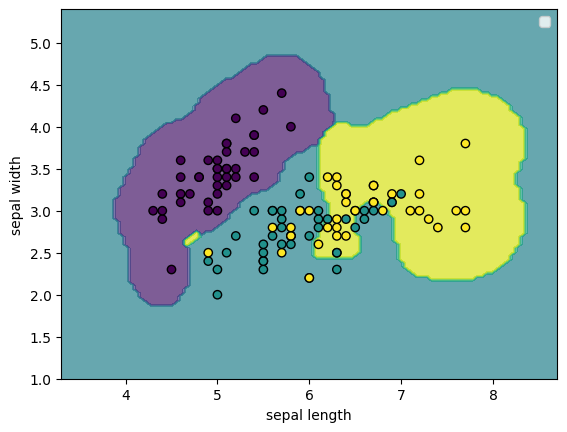

In [54]:
# 시각화
from sklearn.inspection import DecisionBoundaryDisplay

# 결정 경계
dbd = DecisionBoundaryDisplay.from_estimator(svm_clf,X_train,alpha=0.7)

# 훈련 데이터 산점도
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,edgecolor='k')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()




# SVR (Support Vector Regressor)
| 특징                   | SVM                                    | SVR                                    |
|----------------------|---------------------------------------|---------------------------------------|
| **목적**              | 이진 분류 문제 해결                   | 연속적인 값 예측                      |
| **결정 경계**         | 서포트 벡터와의 거리를 최대화하여 생성 | 데이터 포인트와의 오차를 최소화하여 생성 |
| **마진/허용 오차**    | 마진을 최대화하여 일반화 성능 향상    | ε 매개변수로 허용 오차 범위 설정       |
| **결과**              | 클래스 예측 (이진 분류)               | 연속적인 값 예측                      |



**작동 원리**

1. **𝜖-튜브(엡실론 튜브)**
   - 데이터 포인트와 예측 값 사이의 허용 오차 범위를 정의
   - 𝜖(엡실론 튜브) : 값을 기준으로 오차가 범위 내에 있으면 무시, 범위를 벗어나면 벌칙(Penalty)을 부여

2. **최적화 목표**
   - 𝜖-튜브 내부에 데이터를 포함하면서, 오차를 최소화하고 마진(Margin)을 최대화

3. **커널 트릭**
   - 비선형 데이터를 고차원 공간으로 매핑하여 선형적으로 해결 가능

In [64]:
# 데이터 준비
np.random.seed(0)
X = np.sort(np.random.rand(40,1) *5,axis=0)
y = np.sin(X).ravel() + np.random.randn(40) * 0.1

X_test = np.linspace(0,5,100).reshape(-1,1)


In [65]:
# 모델 학습 및 예측
from sklearn.svm import SVR

svr_ = SVR()
# 학습
svr_.fit(X,y)
# 예측
pred = svr_.predict(X_test)

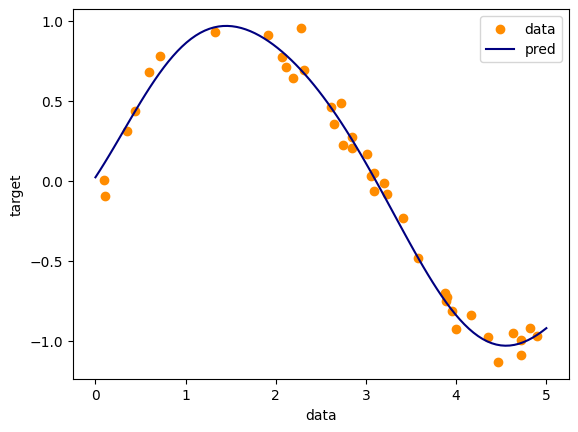

In [66]:
plt.scatter(X,y,color='darkorange',label='data')
plt.plot(x_test,pred,color='navy',label='pred')

plt.xlabel('data')
plt.ylabel('target')
plt.legend()
plt.show()



0.1


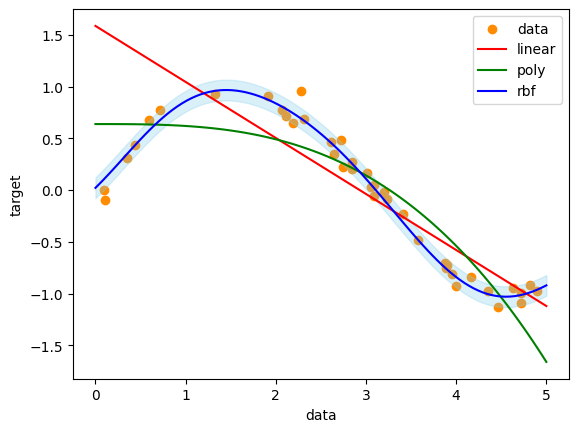

In [67]:
# 모델 학습 및 예측
from sklearn.svm import SVR

# linear,poly 커널 적용
svr_rbf = SVR(kernel='rbf')
linear_svr = SVR(kernel='linear')
poly_svr = SVR(kernel='poly')

# 학습
svr_rbf.fit(X,y)
linear_svr.fit(X,y)
poly_svr.fit(X,y)


# 예측
pred_rbf = svr_rbf.predict(X_test)
pred_linear = linear_svr.predict(X_test)
pred_poly = poly_svr.predict(X_test)


plt.scatter(X,y,color='darkorange',label='data')
# 결과 시각화
plt.plot(X_test,pred_linear,color='red',label='linear')
plt.plot(X_test,pred_poly,color='green',label='poly')
plt.plot(X_test,pred_rbf,color='blue',label='rbf')


svr_rbf_epsilon = svr_rbf.epsilon
print(svr_rbf_epsilon)
epsilon_upper =  pred_rbf + svr_rbf_epsilon
epsilon_lower =  pred_rbf - svr_rbf_epsilon

plt.fill_between(X_test.ravel(),epsilon_lower,epsilon_upper,color='skyblue',alpha = 0.3)

plt.xlabel('data')
plt.ylabel('target')
plt.legend()
plt.show()

##### 캘리포니아 주택 가격 예측

In [68]:
# 데이터 로드
from sklearn.datasets import fetch_california_housing

housing_data = fetch_california_housing()
# 데이터 분리 및 스케일
X = housing_data.data
y = housing_data.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


# SVR 모델 훈련 및 평가

(array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]))